In [ ]:
#Data Data Cleaning and Exploratory Analysis

In [3]:
#Link vídeo da Análise original, professora Patrícia Siqueira Ramos - UFAL
#https://www.youtube.com/watch?v=0SgghZ5S87o
#Link dados Rural:
#URL: https://dados.agricultura.gov.br/dataset/sisser3\
#DICIONÁRIO DADOS: https://dados.agricultura.gov.br/dataset/baefdc68-9bad-4204-83e8-f2888b79ab48/resource/2c5c55d0-1473-4749-b08f-cfaf887a9fa3/download/dicionariodedados-sisser.pdf


NameError: name 'README' is not defined

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.options.display.float_format = '{:.2f}'.format #para os números aparecerem com duas casas decimais
pd.set_option('display.max_columns', 50) #mostra 50 colunas ou o número desejado
pd.set_option('future.no_silent_downcasting', True)

dados = pd.read_excel("dados-2016-2021.xlsx", decimal=',')
dados.shape

#salvando os dados de 2021
dados21 = dados[dados['ANO_APOLICE'] == 2021]
dados21.shape

#Cada uma das 212839 linhas, é uma apólice contratada por um produtor. 

dados21.head

#cópia de segurança (copy of our database), vamos trabalhar com uma cópia dos dados, não com o conjunto original
seg = dados21.copy()

seg.head()

seg.tail()

seg.sample(10)

seg.columns #mostra as variáveis que temos no conjunto de dados

seg.info() #algumas variáveis, como DT_FIM_VIGENCIA vão precisar ter o seu dtype alterado. 

#FILTRANDO LINHAS #fazendo apenas consultas na base
#aqui vamos usar principalmente o método iloc
#iloc: que é utilizado para selecionar linhas e colunas, a partir de sua posição inteira
#loc: e não a partir dos rótulos ou nomes das linhas/colunas 

seg.iloc[:20, :10] #os dois pontos indicam toda a coluna

seg['NM_CULTURA_GLOBAL'].unique() #verificando quais tipos de culturas


seg['NM_MUNICIPIO_PROPRIEDADE'].unique() #verificando quantos municipios

seg['SG_UF_PROPRIEDADE'].unique() #verificando os estados

#selecionando a partir do nome da coluna
seg.loc[:, ['NR_AREA_TOTAL', 'NR_PRODUTIVIDADE_ESTIMADA', 'VL_LIMITE_GARANTIA', 
            'VL_PREMIO_LIQUIDO', 'VL_SUBVENCAO_FEDERAL', 'NR_APOLICE', 'NM_CULTURA_GLOBAL']]
 

#selecionando o estado do PR
seg_pr = seg.loc[seg['SG_UF_PROPRIEDADE'] == 'PR'] 

#principais culturas seguradas do Estado do PR
seg_pr['NM_CULTURA_GLOBAL'].unique()

#salvando os dados do meu município
seg_maringa = seg.loc[seg['NM_MUNICIPIO_PROPRIEDADE'] == 'Maringá'] 

#principais safras seguradas do meu municipio
seg_maringa['NM_CULTURA_GLOBAL'].unique() 

#poderíamos usar o query também
seg.query('(NM_MUNICIPIO_PROPRIEDADE == "Maringá") and (NM_CULTURA_GLOBAL == "Soja")')

<class 'pandas.core.frame.DataFrame'>
Index: 212839 entries, 484614 to 697452
Data columns (total 38 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   NM_RAZAO_SOCIAL            212839 non-null  object        
 1   CD_PROCESSO_SUSEP          212839 non-null  int64         
 2   NR_PROPOSTA                212839 non-null  object        
 3   ID_PROPOSTA                212839 non-null  int64         
 4   DT_PROPOSTA                212839 non-null  datetime64[ns]
 5   DT_INICIO_VIGENCIA         212839 non-null  datetime64[ns]
 6   DT_FIM_VIGENCIA            212839 non-null  object        
 7   NM_SEGURADO                212839 non-null  object        
 8   NR_DOCUMENTO_SEGURADO      212839 non-null  object        
 9   NM_MUNICIPIO_PROPRIEDADE   212839 non-null  object        
 10  SG_UF_PROPRIEDADE          212839 non-null  object        
 11  LATITUDE                   212839 non-null  object  

,NM_RAZAO_SOCIAL,CD_PROCESSO_SUSEP,NR_PROPOSTA,ID_PROPOSTA,DT_PROPOSTA,DT_INICIO_VIGENCIA,DT_FIM_VIGENCIA,NM_SEGURADO,NR_DOCUMENTO_SEGURADO,NM_MUNICIPIO_PROPRIEDADE,SG_UF_PROPRIEDADE,LATITUDE,NR_GRAU_LAT,NR_MIN_LAT,NR_SEG_LAT,LONGITUDE,NR_GRAU_LONG,NR_MIN_LONG,NR_SEG_LONG,NR_DECIMAL_LATITUDE,NR_DECIMAL_LONGITUDE,NM_CLASSIF_PRODUTO,NM_CULTURA_GLOBAL,NR_AREA_TOTAL,NR_ANIMAL,NR_PRODUTIVIDADE_ESTIMADA,NR_PRODUTIVIDADE_SEGURADA,NivelDeCobertura,VL_LIMITE_GARANTIA,VL_PREMIO_LIQUIDO,PE_TAXA,VL_SUBVENCAO_FEDERAL,NR_APOLICE,DT_APOLICE,ANO_APOLICE,CD_GEOCMU,VALOR_INDENIZAÇÃO,EVENTO_PREPONDERANTE
524955,Allianz Seguros S.A,15414002759200717,116373451,1335705,2021-05-26,2021-09-15,2022-04-03 00:00:00,PATRICK ALEXANDRE CONEJO BORTOLO,***10734982,Maringá,PR,S,23,21,32,W,52,2,4,-,-,PRODUTIVIDADE,Soja,38.72,0,3787.41,2461.82,0.65,223052.76,11211.09,0.05,2242.21,5177202135010003619,2021-05-27,2021,4115200,100847.58,SECA
524992,Allianz Seguros S.A,15414002759200717,116373742,1335742,2021-05-26,2021-09-15,2022-04-03 00:00:00,PATRICK ALEXANDRE CONEJO BORTOLO,***10734982,Maringá,PR,S,23,21,1,W,52,2,44,-,-,PRODUTIVIDADE,Soja,29.04,0,3787.41,2461.82,0.65,167289.57,8408.33,0.05,1681.66,5177202135010003618,2021-05-27,2021,4115200,45591.56,SECA
525004,Allianz Seguros S.A,15414002759200717,116373896,1335754,2021-05-26,2021-09-15,2022-04-03 00:00:00,PATRICK ALEXANDRE CONEJO BORTOLO,***10734982,Maringá,PR,S,23,20,50,W,52,3,16,-,-,PRODUTIVIDADE,Soja,10.89,0,3787.41,2461.82,0.65,62733.59,3153.10,0.05,630.61,5177202135010003617,2021-05-27,2021,4115200,0,SECA
525013,Allianz Seguros S.A,15414002759200717,116374031,1335765,2021-05-26,2021-09-15,2022-04-03 00:00:00,PATRICK ALEXANDRE CONEJO BORTOLO,***10734982,Maringá,PR,S,23,24,2,W,52,1,28,-,-,PRODUTIVIDADE,Soja,12.10,0,3787.41,2461.82,0.65,69703.99,3503.43,0.05,700.68,5177202135010003616,2021-05-27,2021,4115200,35182.79,SECA
525026,Allianz Seguros S.A,15414002759200717,116374411,1335778,2021-05-26,2021-09-15,2022-04-03 00:00:00,ADRIANA RAFAEL BORTOLO,***03860926,Maringá,PR,S,23,24,0,W,52,3,18,-,-,PRODUTIVIDADE,Soja,25.00,0,3787.41,2461.82,0.65,144016.50,7238.56,0.05,1447.70,5177202135010003615,2021-05-27,2021,4115200,75431.16,SECA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
680783,BRASILSEG COMPANHIA DE SEGUROS,15414609027202020,263607701,1507272,2021-04-09,2021-04-09,2022-04-09 00:00:00,MARCELO VINICIUS ARANTES,***13551900,Maringá,PR,S,23,27,53,W,51,55,12,-,-,CUSTEIO,Soja,140.00,-,3597,2517.90,0.70,344723.16,32411.47,0.09,6482.29,132447,2021-04-22,2021,4115200,94419.67,SECA
680896,BRASILSEG COMPANHIA DE SEGUROS,15414001668201141,267035090,1507387,2021-10-19,2021-10-19,2022-10-19 00:00:00,JOSUE FAGUNDES VERDERIO JUNIOR,***63198991,Maringá,PR,S,23,30,11,W,52,2,57,-,-,CUSTEIO,Soja,47.00,-,3100,2170,0.70,326500.82,25440.28,0.08,5088.06,186197,2021-10-25,2021,4115200,239216.23,SECA
683343,BRASILSEG COMPANHIA DE SEGUROS,15414001668201141,264309973,1509915,2021-05-24,2021-05-24,2022-05-24 00:00:00,MARIA IZABEL RODRIGUES MUNHOZ,***45990912,Maringá,PR,S,23,19,37,W,52,1,7,-,-,CUSTEIO,Soja,36.30,-,3652,2556.40,0.70,489739.82,17205.12,0.04,3441.02,141671,2021-05-26,2021,4115200,70333.90,INUNDAÇÃO/TROMBA D´ÁGUA
683787,BRASILSEG COMPANHIA DE SEGUROS,15414001668201141,266665058,1510362,2021-09-28,2021-09-28,2022-09-28 00:00:00,NELIDA CREMM PAVESI,***11010900,Maringá,PR,S,23,20,37,W,51,58,17,-,-,CUSTEIO,Soja,60.50,-,3560,2492,0.70,466018.64,39172.79,0.08,7834.56,181710,2021-09-30,2021,4115200,146899.99,CHUVA EXCESSIVA


In [5]:
#Resumindo os dados

seg.describe()

,CD_PROCESSO_SUSEP,ID_PROPOSTA,DT_PROPOSTA,DT_INICIO_VIGENCIA,NR_GRAU_LAT,NR_MIN_LAT,NR_SEG_LAT,NR_GRAU_LONG,NR_MIN_LONG,NR_SEG_LONG,NR_AREA_TOTAL,VL_LIMITE_GARANTIA,VL_PREMIO_LIQUIDO,PE_TAXA,VL_SUBVENCAO_FEDERAL,DT_APOLICE,ANO_APOLICE
count,212839.00,212839.00,212839,212839,212839.00,212839.00,212839.00,212839.00,212839.00,212839.00,212839.00,212839.00,212839.00,212839.00,212839.00,212839,212839.00
mean,15414423377698950.00,1408981.47,2021-06-15 18:28:28.502671104,2021-06-23 12:01:20.173276672,23.35,28.74,29.19,50.61,29.39,29.32,64.30,312463.30,19397.15,0.08,5416.18,2021-06-30 01:20:21.762928896,2021.00
min,15414000338200590.00,1289687.00,2020-07-17 00:00:00,2020-07-17 00:00:00,0.00,0.00,0.00,34.00,0.00,0.00,0.00,753.48,55.34,0.00,0.01,2021-01-01 00:00:00,2021.00
25%,15414004195201052.00,1349849.50,2021-04-13 00:00:00,2021-04-19 00:00:00,22.00,13.00,14.00,49.00,14.00,14.00,12.42,71916.99,4960.00,0.05,1499.85,2021-04-27 00:00:00,2021.00
50%,15414609027202020.00,1409652.00,2021-07-01 00:00:00,2021-07-07 00:00:00,24.00,28.00,29.00,51.00,30.00,29.00,30.00,150027.47,10239.68,0.07,3147.74,2021-07-15 00:00:00,2021.00
75%,15414900270201600.00,1468900.50,2021-08-17 00:00:00,2021-08-30 00:00:00,26.00,44.00,44.00,53.00,44.00,45.00,71.80,338111.80,22598.85,0.10,6540.79,2021-08-31 00:00:00,2021.00
max,15414901782201416.00,1524283.00,2021-12-23 00:00:00,2022-04-02 00:00:00,33.00,93.00,99.00,70.00,66.00,98.00,290985.00,520323520.32,893218.14,1.00,48000.00,2021-12-28 00:00:00,2021.00
std,412730730553.47,68204.95,NaN,NaN,4.21,17.71,17.54,3.11,17.32,17.55,672.28,1374670.95,27293.34,0.04,6703.20,NaN,0.00


In [6]:
medidas_resumo1 = seg[['VL_PREMIO_LIQUIDO', 'VL_SUBVENCAO_FEDERAL', 'NR_AREA_TOTAL']].quantile([0.25, 0.5, 0.75])
medidas_resumo1

,VL_PREMIO_LIQUIDO,VL_SUBVENCAO_FEDERAL,NR_AREA_TOTAL
0.25,4960.00,1499.85,12.42
0.50,10239.68,3147.74,30.00
0.75,22598.85,6540.79,71.80


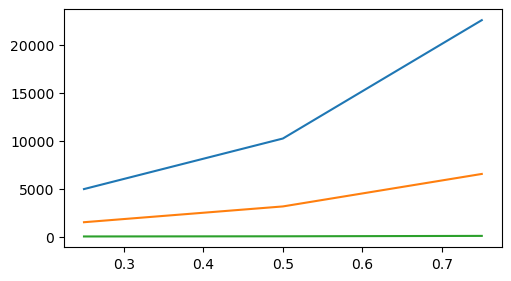

In [7]:
plt.figure(figsize=(5, 2.7), layout='constrained')
plt.plot(medidas_resumo1, label = 'linear')

In [30]:
medidas_resumo2 = seg[['VL_PREMIO_LIQUIDO', 'VL_SUBVENCAO_FEDERAL', 'VL_LIMITE_GARANTIA', 'NR_AREA_TOTAL']].agg(['mean', 'min', 'max'])
medidas_resumo2

,VL_PREMIO_LIQUIDO,VL_SUBVENCAO_FEDERAL,VL_LIMITE_GARANTIA,NR_AREA_TOTAL
mean,19397.15,5416.18,312463.30,64.30
min,55.34,0.01,753.48,0.00
max,893218.14,48000.00,520323520.32,290985.00


In [9]:
#seguradoras
seg['NM_RAZAO_SOCIAL'].unique()

array(['Newe Seguros S.A', 'BRASILSEG COMPANHIA DE SEGUROS',
       'Mapfre Seguros Gerais S.A.',
       'FairFax Brasil Seguros Corporativos S/A', 'Too Seguros S.A.',
       'Tokio Marine Seguradora S.A.',
       'Swiss Re Corporate Solutions Brasil S.A.', 'Allianz Seguros S.A',
       'Sancor Seguros do Brasil S.A.', 'Aliança do Brasil Seguros S/A.',
       'Essor Seguros S.A.', 'Porto Seguro Companhia de Seguros Gerais',
       'Companhia Excelsior de Seguros', 'Sompo Seguros S/A',
       'EZZE Seguros S.A.'], dtype=object)

In [25]:
#apolices por seguradora, Normalize = True p/ porcentagem
apolices_por_seguradora = seg['NM_RAZAO_SOCIAL'].value_counts(normalize=True) 
apolices_por_seguradora

NM_RAZAO_SOCIAL
BRASILSEG COMPANHIA DE SEGUROS             0.34
Essor Seguros S.A.                         0.16
Mapfre Seguros Gerais S.A.                 0.09
Tokio Marine Seguradora S.A.               0.08
Newe Seguros S.A                           0.08
FairFax Brasil Seguros Corporativos S/A    0.08
Swiss Re Corporate Solutions Brasil S.A.   0.05
Allianz Seguros S.A                        0.04
Sancor Seguros do Brasil S.A.              0.03
Aliança do Brasil Seguros S/A.             0.02
Too Seguros S.A.                           0.02
Sompo Seguros S/A                          0.01
Porto Seguro Companhia de Seguros Gerais   0.01
EZZE Seguros S.A.                          0.00
Companhia Excelsior de Seguros             0.00
Name: proportion, dtype: float64

<Axes: xlabel='NM_RAZAO_SOCIAL'>

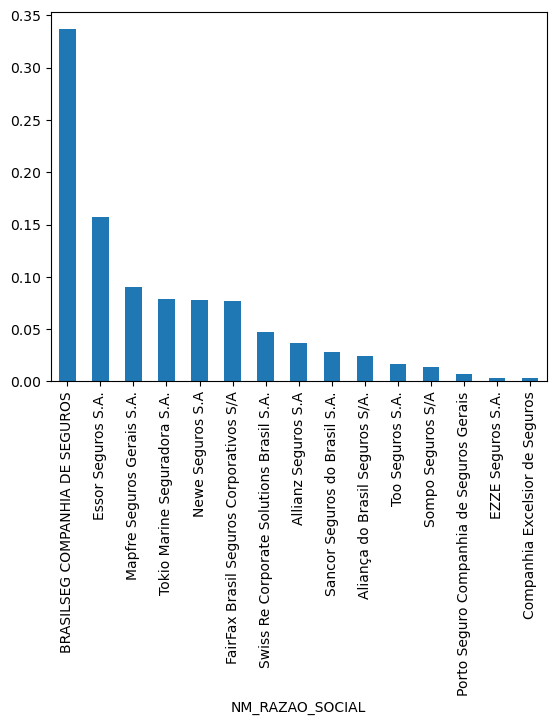

In [28]:
apolices_por_seguradora.plot.bar() 

In [ ]:
#LIMPEZA E ORGANIZAÇÃO DOS DADOS

In [31]:
#verificar se existe algum valor faltante, sem o sum retorna true e false
seg.isna().sum()

NM_RAZAO_SOCIAL              0
CD_PROCESSO_SUSEP            0
NR_PROPOSTA                  0
ID_PROPOSTA                  0
DT_PROPOSTA                  0
DT_INICIO_VIGENCIA           0
DT_FIM_VIGENCIA              0
NM_SEGURADO                  0
NR_DOCUMENTO_SEGURADO        0
NM_MUNICIPIO_PROPRIEDADE     0
SG_UF_PROPRIEDADE            0
LATITUDE                     0
NR_GRAU_LAT                  0
NR_MIN_LAT                   0
NR_SEG_LAT                   0
LONGITUDE                    0
NR_GRAU_LONG                 0
NR_MIN_LONG                  0
NR_SEG_LONG                  0
NR_DECIMAL_LATITUDE          0
NR_DECIMAL_LONGITUDE         0
NM_CLASSIF_PRODUTO           0
NM_CULTURA_GLOBAL            0
NR_AREA_TOTAL                0
NR_ANIMAL                    0
NR_PRODUTIVIDADE_ESTIMADA    0
NR_PRODUTIVIDADE_SEGURADA    0
NivelDeCobertura             0
VL_LIMITE_GARANTIA           0
VL_PREMIO_LIQUIDO            0
PE_TAXA                      0
VL_SUBVENCAO_FEDERAL         0
NR_APOLI

In [33]:
#ações possíveis para tratamento de informações faltantes (caso seja necessario)
seg = seg.fillna(0) #substitui faltantes por algum valor



C:\Users\Usuario\AppData\Local\Temp\ipykernel_4172\4039070903.py:2: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  seg = seg.fillna(0) #substitui faltantes por algum valor


In [35]:
#substituir faltantes de uma variável pela média da variável
seg['VL_PREMIO_LIQUIDO'] = seg['VL_PREMIO_LIQUIDO'].fillna(seg['VL_PREMIO_LIQUIDO'].mean())

In [41]:
#aqui temos alguns caracteres como '-', por isso vamos retirá-los no 
seg['NR_ANIMAL'].unique()

array([0, '-', 143, 8, 96, 141, 112, 100, 48, 1055, 176, 79, 966, 122,
       130, 86, 90, 50, 84, 44, 25, 180, 771, 1787, 60, 53, 54, 1, 2507,
       2, 512, 451, 110, 923, 67, 105, 24, 77, 165, 40, 69, 148, 524, 231,
       300, 5, 3, 120, 4, 17, 6, 11, 26, 32, 13, 240, 106, 322, 94, 867,
       125, 128, 66, 283, 37, 1323, 6200, 70, 52, 62, 80, 260, 42, 116,
       36, 292, 10, 858, 172, 61, 43, 33, 83, 99, 57, 72, 150, 155, 216,
       20, 273, 115, 88, 245, 64, 111, 233, 200, 183, 101, 421, 218, 163,
       851, 55, 117, 370, 65, 196, 371, 550, 140, 169, 160, 109, 185, 268,
       335, 426, 184, 68, 166, 535, 214, 1390, 1530, 103, 500, 87, 89,
       235, 450, 19, 350, 30, 27, 220, 560, 145, 82, 146, 75, 45, 164, 95,
       39, 142, 210, 76, 1300, 492, 168, 1790, 361, 212, 632, 78, 605,
       1256, 97, 171, 34, 360, 281, 187, 41, 119, 232, 51, 74, 650, 7,
       126, 93, 249, 279, 134, 63, 250, 285, 540, 49, 107, 1200, 14, 35,
       38, 46, 1027, 314, 286, 22, 31, 16, 15, 312, 1

In [39]:
#substituir caracteres como '.', '-', '...', etc
#salvando em um novo objeto, para manter os dados em seg originais
df = seg.replace(['-', '...', 'X'], 0)
df.dropna(inplace=True, how='all') #apagar ,linhas, caso ainda exista alguma com valores faltantes. 


In [50]:
#function from: https://matplotlib.org/stable/users/explain/quick_start.html#quick-start
#função caso precise fazer as mesmas plotagens com dados diferentes
#data1 = seg[['VL_PREMIO_LIQUIDO', 'VL_SUBVENCAO_FEDERAL', 'NR_AREA_TOTAL']].quantile([0.25, 0.5, 0.75])
#data2 = seg[[

#def my_plotter(ax, data1, data2, param_dict):
#    """
#    A helper function to make a graph.
#    """
#    out = ax.plot(data1, data2, **param_dict)
#    return out


#data1, data2, data3, data4 = np.random.randn(4, 100)  # make 4 random data sets
#fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(5, 2.7))
#my_plotter(ax1, data1, data2, {'marker': 'x'})
#my_plotter(ax2, data3, data4, {'marker': 'o'})